In [110]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/real-estate-goldmine-dubai-uae-rental-market/dubai_properties.csv


In [111]:
data_set = pd.read_csv("/kaggle/input/real-estate-goldmine-dubai-uae-rental-market/dubai_properties.csv")

In [ ]:
data_set[:2].head()


In [ ]:
data_set['Location'].value_counts()

In [ ]:
data_set.describe()

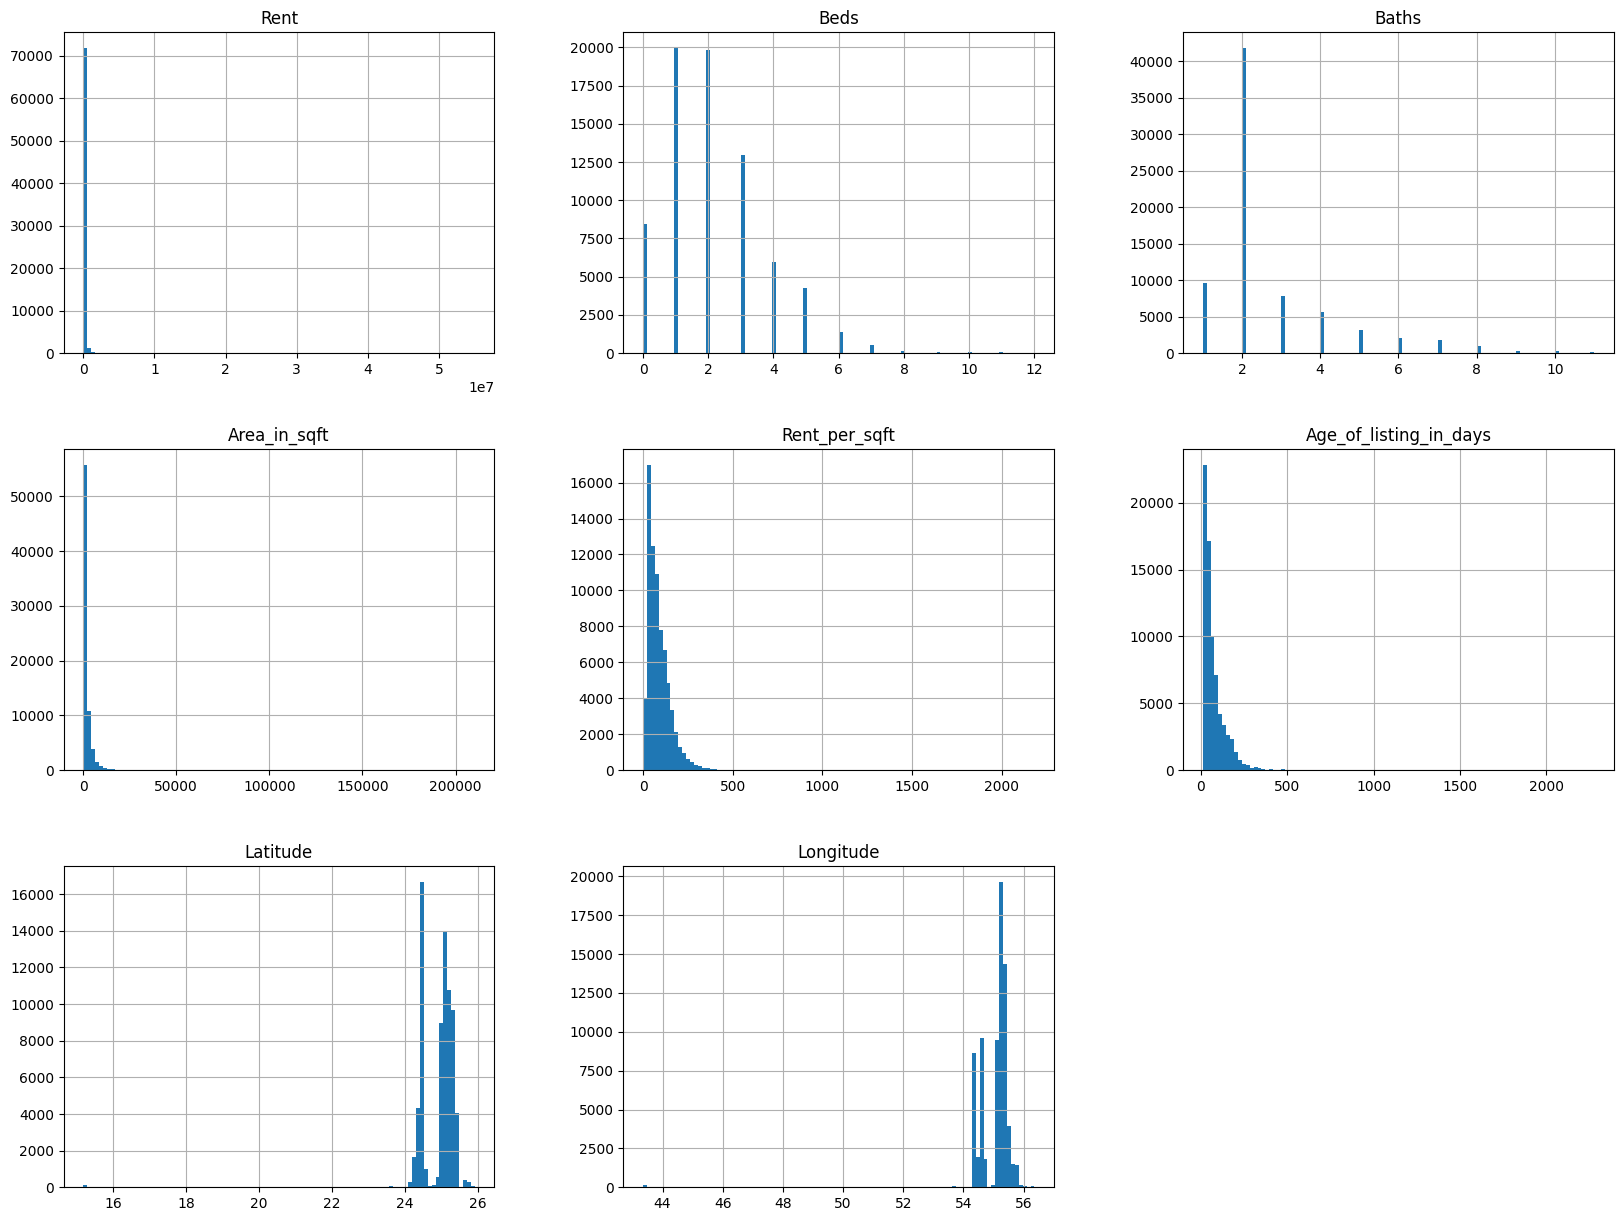

In [113]:
import matplotlib.pyplot as plt
data_set.hist(bins=100,figsize=(20,15))
plt.show()

In [ ]:
print(len(train_set))
print(len(test_set))

In [114]:
data = data_set.copy()
#data['bed_and_baths'] = data['Baths'] + data['Beds'] toplamak da lineer olarak bağlantısız
data['bed_per_baths'] = data['Beds'] / data['Baths']
#data['years_listing'] = data['Age_of_listing_in_days'] / 360bir şeyi değiştirmez  

In [87]:
corr_matrix = data.corr(numeric_only=True)
corr_matrix['Rent'].sort_values(ascending=False)

Rent                      1.000000
Area_in_sqft              0.405517
bed_per_baths             0.372741
Rent_per_sqft             0.348656
Beds                      0.309589
Baths                     0.080591
Latitude                  0.027837
Longitude                 0.007521
Age_of_listing_in_days    0.000885
Name: Rent, dtype: float64

<Axes: xlabel='Area_in_sqft', ylabel='Rent'>

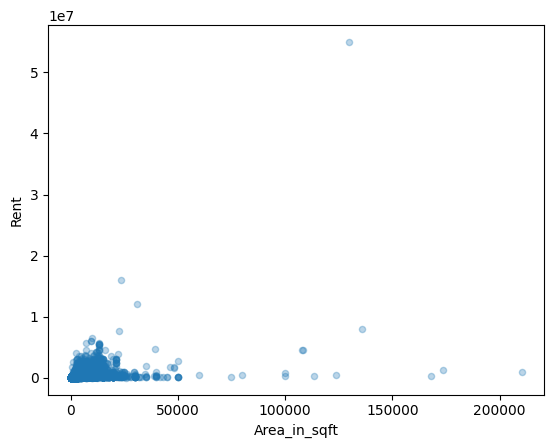

In [88]:
data.plot(kind='scatter',x='Area_in_sqft',y='Rent',alpha = 0.3)

In [89]:
for attr in data.columns:
    if len(data[attr]) != len(data[data[attr].notnull()]):
        print(attr+" there are null values")
    else:
        print("no missing value on "+ attr)

#Tek missing valuelar olan attributelar coğrafi attributelar

no missing value on Address
no missing value on Rent
no missing value on Beds
no missing value on Baths
no missing value on Type
no missing value on Area_in_sqft
no missing value on Rent_per_sqft
no missing value on Rent_category
no missing value on Frequency
no missing value on Furnishing
no missing value on Purpose
no missing value on Posted_date
no missing value on Age_of_listing_in_days
no missing value on Location
no missing value on City
Latitude there are null values
Longitude there are null values
no missing value on bed_per_baths


In [92]:
print(len(data['Longitude']) , len(data[data['Longitude'].notnull()]))
#Baya bir şey değiştiriyor coğrafi data bu nedenle bence direkt onları yok saymak mantıklı

73023 73023


In [115]:
from sklearn.impute import SimpleImputer
data = data.dropna(subset=["Latitude"])
data = data.dropna(subset=["Longitude"])

In [ ]:
data = data.drop(['Frequency','Purpose','Posted_date','Address'],axis=1)

In [122]:
data.head()

,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Furnishing,Age_of_listing_in_days,Location,City,Latitude,Longitude,bed_per_baths
0,124000,3,4,Apartment,1785,69.467787,Medium,Unfurnished,45,Al Reem Island,Abu Dhabi,24.493598,54.407841,0.750000
1,140000,3,4,Apartment,1422,98.452883,Medium,Unfurnished,44,Yas Island,Abu Dhabi,24.494022,54.607372,0.750000
2,99000,2,3,Apartment,1314,75.342466,Medium,Furnished,31,Al Raha Beach,Abu Dhabi,24.485931,54.600939,0.666667
3,220000,3,4,Penthouse,3843,57.246942,High,Unfurnished,57,Al Reem Island,Abu Dhabi,24.493598,54.407841,0.750000
4,350000,5,7,Villa,6860,51.020408,High,Unfurnished,65,Yas Island,Abu Dhabi,24.494022,54.607372,0.714286


In [123]:
from sklearn.model_selection import StratifiedShuffleSplit # Stratified bir data split yapılmış olunur.
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data['Rent']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [96]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
('std_scaler', StandardScaler()),
])

In [97]:
data_num = data.drop(['Furnishing','City','Location','Type','Rent_category'],axis=1)

In [98]:
from sklearn.compose import ColumnTransformer
num_attribs = list(data_num)
cat_attribs = ['Rent_category','Furnishing','City','Location','Type']
full_pipeline = ColumnTransformer([
("num", num_pipeline, num_attribs),
("cat", OneHotEncoder(), cat_attribs),
])
data_prepared = full_pipeline.fit_transform(data)

<Axes: xlabel='Longitude', ylabel='Latitude'>

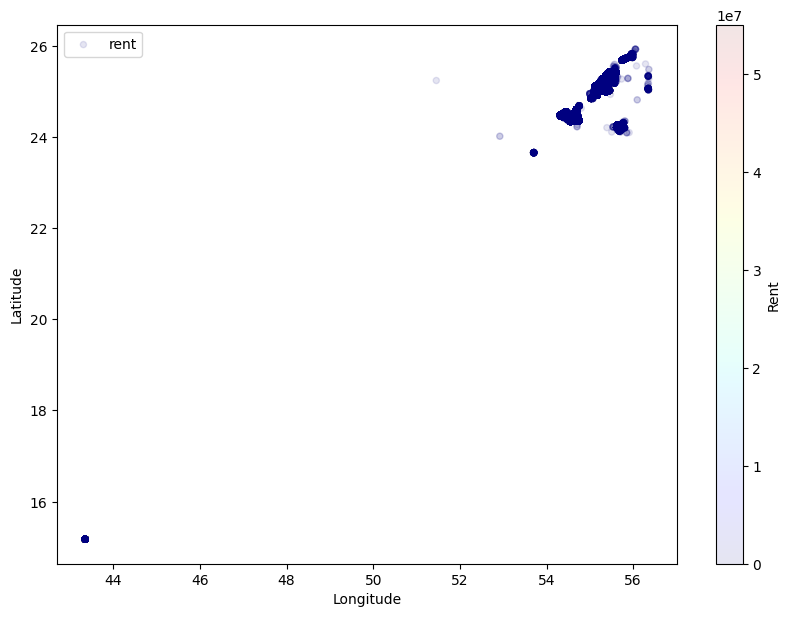

In [68]:
data.plot(kind="scatter", x="Longitude", y="Latitude",alpha = 0.1
            ,label="rent",figsize = (10,7),c = "Rent",
              cmap=plt.get_cmap("jet"), colorbar=True
)

KeyError: '[73280, 73672, 73023, 73399, 73111, 73149, 73631, 73538, 73544, 73537, 73277, 73683, 73681, 73505, 73531, 73110, 73565, 73419, 73222, 73717, 73353, 73283, 73376, 73739, 73699, 73719, 73624, 73533, 73271, 73433, 73369, 73450, 73471, 73322, 73089, 73147, 73307, 73423, 73312, 73493, 73668, 73075, 73211, 73184, 73676, 73508, 73319, 73649, 73182, 73590, 73238, 73323, 73224, 73053, 73083, 73265, 73227, 73241, 73412, 73214, 73362, 73383, 73487, 73644, 73607, 73701, 73497, 73498, 73112, 73448, 73512, 73658, 73196, 73528, 73541, 73050, 73337, 73228, 73620, 73435, 73321, 73513, 73535, 73480, 73408, 73256, 73617, 73370, 73462, 73486, 73300, 73724, 73704, 73125, 73430, 73494, 73302, 73441, 73589, 73310, 73630, 73608, 73605, 73034, 73506, 73402, 73190, 73696, 73530, 73278, 73292, 73129, 73496, 73415, 73056, 73734, 73591, 73213, 73303, 73092, 73625, 73168, 73422, 73352, 73281, 73118, 73382, 73124, 73645, 73288, 73185, 73077, 73378, 73164, 73042, 73414, 73650, 73431, 73600, 73246, 73258, 73695, 73529, 73274, 73181, 73233, 73158, 73564, 73539, 73392, 73163, 73289, 73108, 73037, 73355, 73071, 73715, 73226, 73622, 73507, 73483, 73316, 73234, 73583, 73308, 73269, 73379, 73134, 73716, 73611, 73038, 73120, 73040, 73325, 73438, 73045, 73482, 73447, 73573, 73201, 73492, 73131, 73553, 73180, 73443, 73273, 73247, 73677, 73641, 73145, 73076, 73375, 73632, 73052, 73516, 73411, 73343, 73728, 73212, 73615, 73171, 73122, 73738, 73093, 73150, 73628, 73709, 73104, 73592, 73245, 73495, 73490, 73413, 73128, 73341, 73354, 73455, 73373, 73723, 73295, 73166, 73350, 73162, 73115, 73348, 73336, 73502, 73581, 73197, 73437, 73542, 73282, 73598, 73439, 73047, 73427, 73669, 73216, 73421, 73682, 73091, 73188, 73520, 73297, 73090, 73585, 73085, 73385, 73488, 73484, 73557, 73479, 73178, 73614, 73561, 73551, 73327, 73633, 73707, 73550, 73044, 73285, 73434, 73400, 73207, 73663, 73478, 73574, 73232, 73475, 73711, 73223, 73121, 73619, 73388, 73041, 73272, 73219, 73177, 73569, 73477, 73060, 73503, 73113, 73736, 73458, 73688, 73268, 73705, 73146, 73562, 73063, 73095, 73395, 73344, 73242, 73138, 73255, 73523, 73509, 73440, 73570, 73726, 73577, 73640, 73349, 73514, 73692, 73342, 73534, 73706, 73733, 73144, 73657, 73079, 73286, 73328, 73560, 73394, 73444, 73159, 73643, 73445, 73028, 73161, 73107, 73257, 73254, 73114, 73460, 73078, 73604, 73142, 73174, 73082, 73094, 73372, 73546, 73252, 73606, 73621, 73294, 73665, 73504, 73596, 73466, 73697, 73522, 73572, 73603, 73713, 73601, 73714, 73276, 73259, 73687, 73291, 73317, 73470, 73335, 73735, 73468, 73689, 73332, 73133, 73526, 73680, 73208, 73261, 73578, 73315, 73229, 73371, 73175, 73401, 73525, 73057, 73105, 73627, 73700, 73652, 73024, 73154, 73199, 73345, 73157, 73299, 73046, 73136, 73296, 73202, 73674, 73230, 73670, 73467, 73220, 73346, 73731, 73103, 73189, 73086, 73397, 73457, 73155, 73664, 73143, 73536, 73380, 73548, 73243, 73532, 73556, 73662, 73648, 73517, 73720, 73313, 73404, 73732, 73330, 73176, 73426, 73690, 73389, 73153, 73025, 73217, 73187, 73311, 73432, 73069, 73263, 73722, 73691, 73262, 73049, 73566, 73398, 73453, 73588, 73251, 73406, 73594, 73326, 73599, 73148, 73721, 73029, 73186, 73260, 73070, 73364, 73137, 73613, 73465, 73547, 73165, 73384, 73191, 73473, 73318, 73576, 73141, 73301, 73626, 73555, 73195, 73651, 73160, 73387, 73324, 73659, 73616, 73368, 73098, 73552, 73646, 73367, 73610, 73218, 73109, 73064, 73304, 73575, 73204, 73298, 73193, 73661, 73033, 73417, 73099, 73424, 73356, 73729, 73656, 73653, 73055, 73568, 73173, 73030, 73703, 73527, 73357, 73036, 73264, 73730, 73123, 73374, 73106, 73267, 73675, 73418, 73386, 73710, 73062, 73524, 73635, 73602, 73270, 73231, 73740, 73290, 73618, 73579, 73545, 73293, 73366, 73429, 73127, 73391, 73360, 73305, 73361, 73183, 73381, 73170, 73593, 73543, 73456, 73634, 73390, 73073, 73235, 73339, 73425, 73210, 73097, 73051, 73215, 73409, 73660, 73396, 73239, 73472, 73065, 73515, 73275, 73451, 73741, 73306, 73584, 73192, 73454, 73084, 73225, 73139, 73058, 73027] not in index'